# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [1]:
import pandas as pd

In [5]:
data=pd.read_csv('diabetes.csv') # import dataset
df=pd.DataFrame(data)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [53]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


---

#### Are there any missing values in the dataset?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### No missing values in the dataset.

---

#### How are the predictor variables related to the outcome variable?
#### What is the correlation between the predictor variables?

I will use correlation analysis by calling corr method on our dataframe as well as visualize correlations with heatmap.

In [18]:
correlation_matrix = df.corr() # calculating correlation matrix

print(correlation_matrix)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

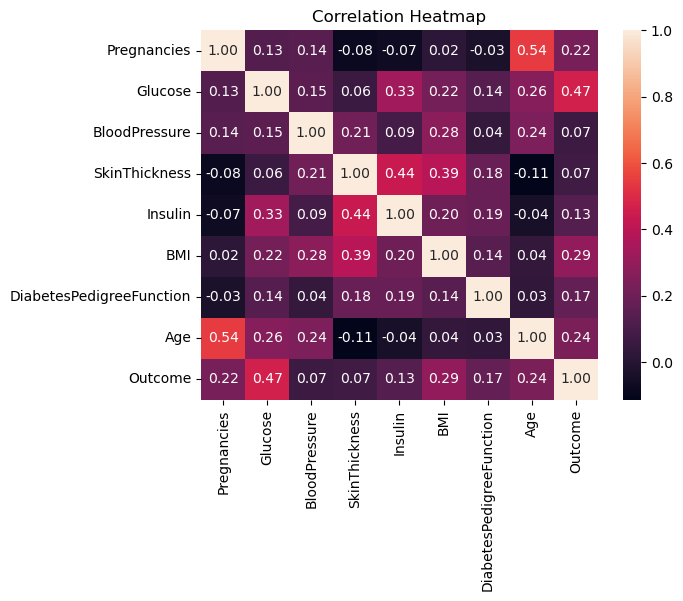

In [28]:
# ploting correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlation_matrix,annot=True,fmt=".2f")

plt.title('Correlation Heatmap')

plt.show()

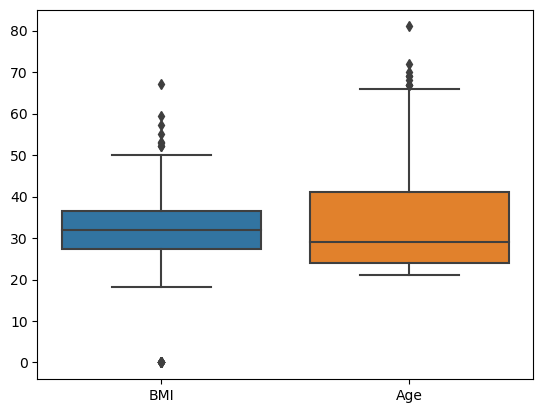

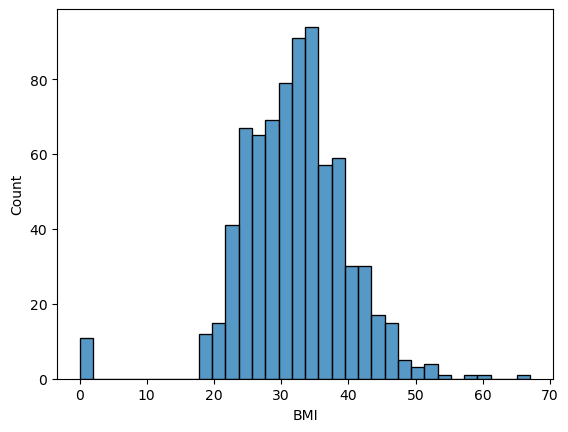

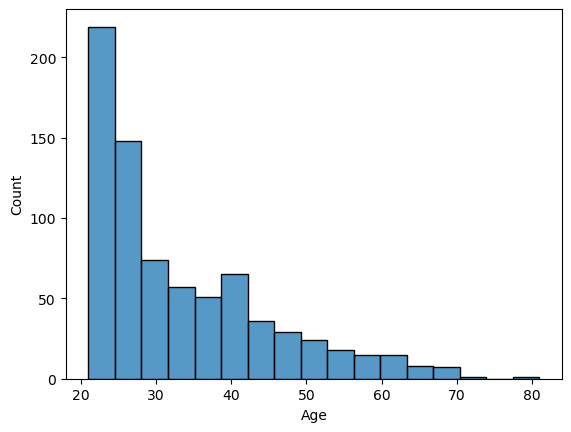

In [40]:
sns.boxplot(data=df[['BMI','Age']])
plt.show()
sns.histplot(data=df['BMI'])
plt.show()
sns.histplot(data=df['Age'])
plt.show()

#### Key findings
<b> Outcome and Predictor Variables:</b><br>
Glucose has strong relationship with Outcome variable (correlation coef is 0.46) <br>
BMI,Age and Pregnancies have noticable relationship (coefs are 0.29, 0.24, 0.22)<br>
The linear relationship between Blood Pressure, Skin Thickness and Outocme is not noticable (coefs are 0.06 and 0.07)

<b> Relationship Between Predictor Variables </b> <br>
Very weak positive correlation between age and BMI (0.036)<br>
Higher skin thickness is significantly associated with higher BMI values (0.393)<br><br>

<b> Additional investigation needed</b><br>
Weak correlations can be as a result of outliers. BMI has 0 values which impacting the correlations. Will be checked and handled in next section. It worth to mention that BMI outliers above 50 seems is possible, just different levels of obessity - which has it's impact to diabeties.


---- 

#### What is the distribution of each predictor variable? Are there any outliers in the predictor variables? 

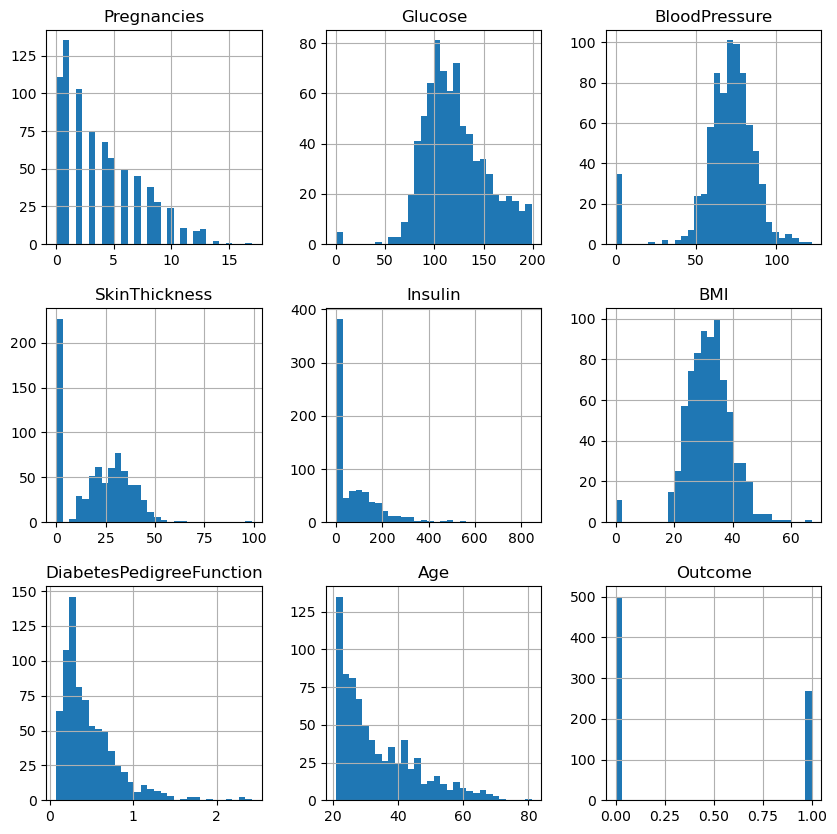

In [52]:
# plotting distributions
df.hist(bins=30, figsize=(10,10))
plt.show()

#### Key findings

Glucose, Blood Pressure, Skin Thickness, Insulin, BMI have noticeable outliers because they cannot have values of zero. <br>
Graphs for pregnancy and age seem normal: even though 17 pregnancies is a quite big number but still possible.


-----

#### How are the predictor variables related to each other? Is there any interaction effect between the predictor variables? <br>

<b> I will answer these questions by creating scatter plots between pairs of predictor variables</b>

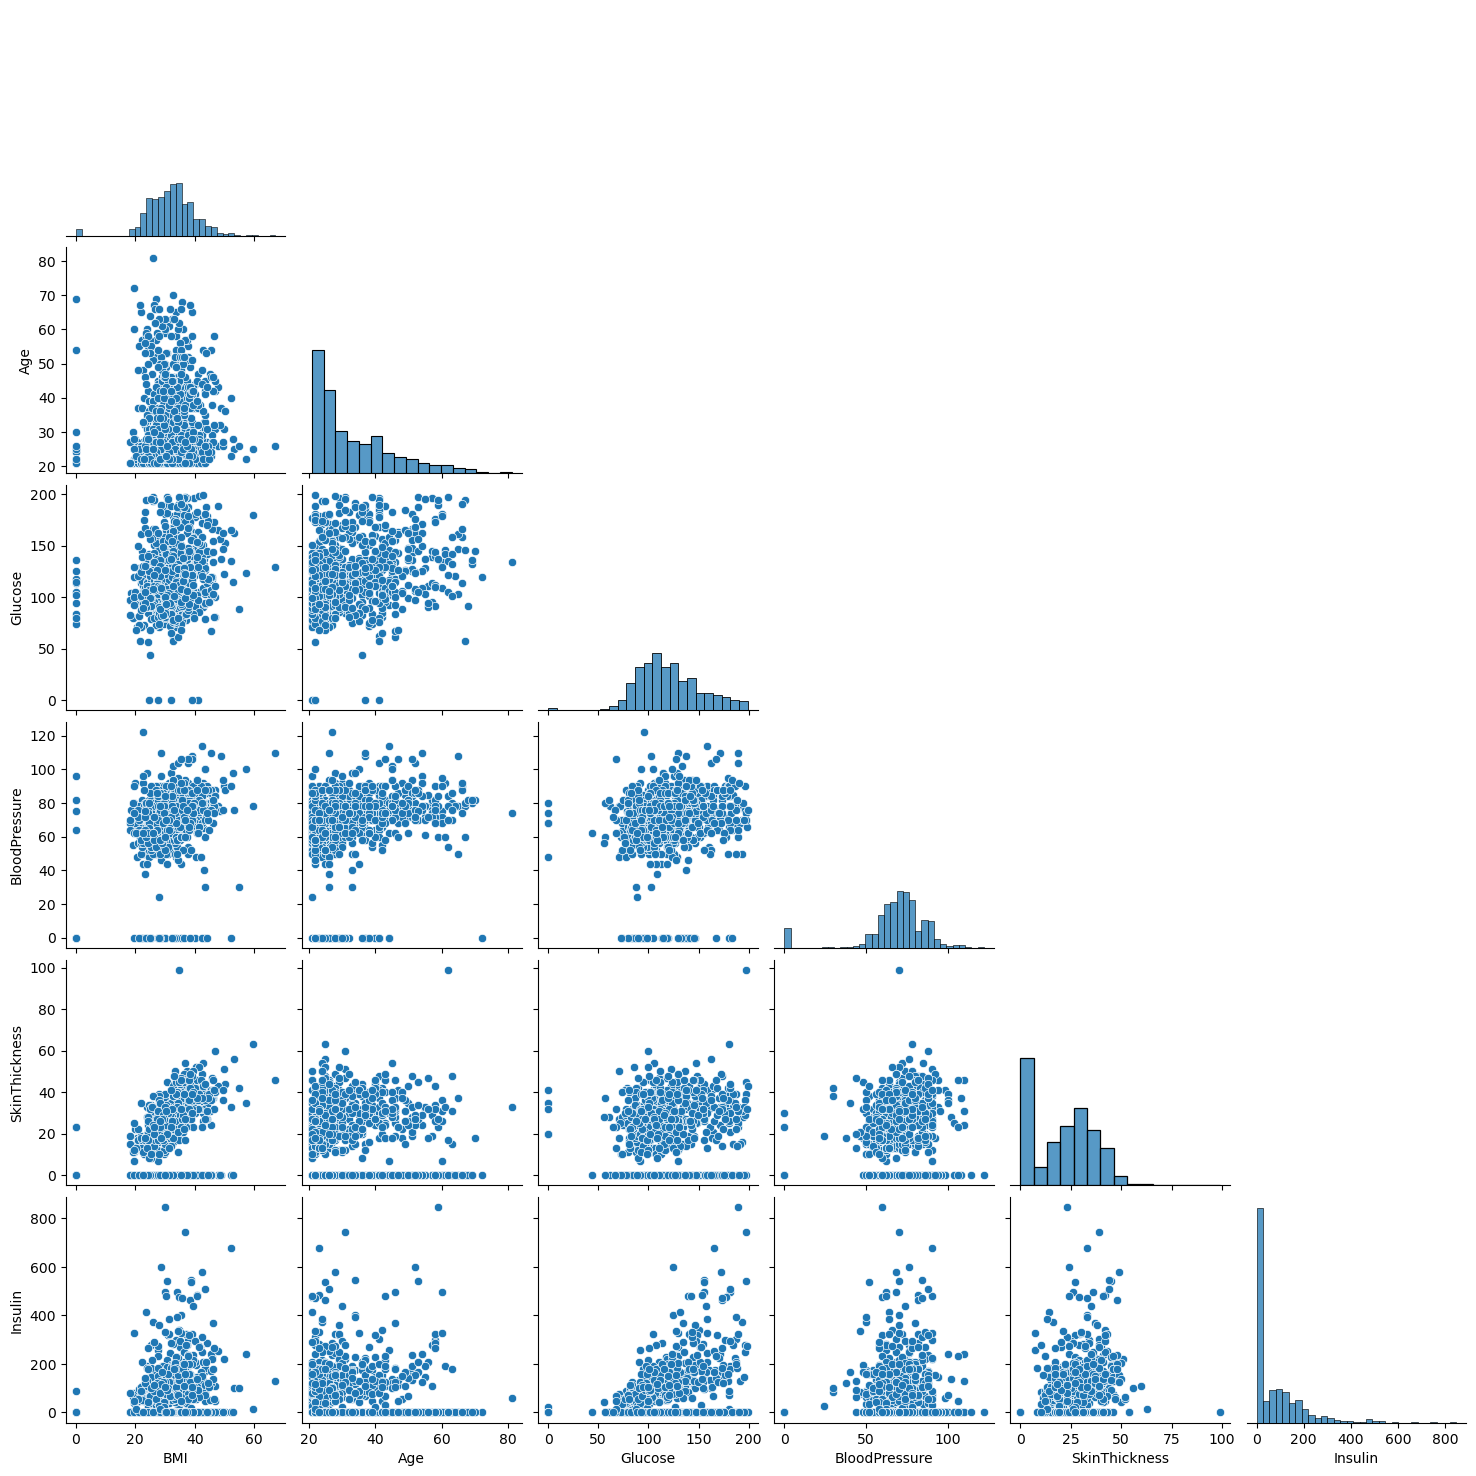

In [61]:
# Create a pairwise scatter plot using Seaborn's pairplot
sns.pairplot(df[['BMI', 'Age', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']],corner=True)
plt.show()

#### Key findings:

Scatter plots didn't reveal any interesting patterns. The Glucose-Insulin plot is more like exponential but still also could be explained by linear relationship.


# Part II : Preprocessing & Feature Engineering

Before answering questions about average values for some features it's better to handle outliers (no missing values to handle :))
The only outlier I have noticed is zero values for different features. I am going to check them and for small quantities just drop them and for the others use mean.

In [80]:
features_to_count = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for feature in features_to_count:
    feature_counts = (df[feature] == 0).sum()
    print(f"Number of zeros in '{feature}': {feature_counts}")

Number of zeros in 'Glucose': 0
Number of zeros in 'BloodPressure': 0
Number of zeros in 'SkinThickness': 192
Number of zeros in 'Insulin': 332
Number of zeros in 'BMI': 0


<b><i>I will drop rows where Glucose, Blood Pressure and BMI have zero values as these rows have small quantities. I will also replace zeros for skin thickness and insulin with their mean values.</b></i>

In [83]:
df.drop(df[(df['Glucose'] == 0) | (df['BloodPressure'] == 0) | (df['BMI'] == 0)].index, inplace=True)

In [85]:
# Calculate the mean for 'SkinThickness' and 'Insulin' excluding zeros
mean_skin_thickness = df[df['SkinThickness'] != 0]['SkinThickness'].mean()
mean_insulin = df[df['Insulin'] != 0]['Insulin'].mean()

# Replace zero values with the calculated means
df['SkinThickness'].replace(0, mean_skin_thickness, inplace=True)
df['Insulin'].replace(0, mean_insulin, inplace=True)

In [87]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,156.056122,33.6,0.627,50,1
1,1,85,66,29.000000,156.056122,26.6,0.351,31,0
2,8,183,64,29.182331,156.056122,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1


---

#### What is the average age of the individuals in the dataset?

In [96]:
average_age=df['Age'].mean()
print(f"Average age of the individuals in the dataset is {int(average_age)} !!!")

Average age of the individuals in the dataset is 33 !!!


---

#### What is the average glucose level for individuals with diabetes and without diabetes?

In [108]:
average_glucose_diabetes=df[df['Outcome']==1]['Glucose'].mean()
average_glucose_no_diabetes=df[df['Outcome']==0]['Glucose'].mean()
print(f"Average glucose level for  individuals with diabetes in the provided dataset is {int(average_glucose_diabetes)} and without diabetes is {int(average_glucose_no_diabetes)}. .")

Average glucose level for  individuals with diabetes in the provided dataset is 142 and without diabetes is 111. .


---

#### What is the average BMI for individuals with diabetes and without diabetes?

In [109]:
average_BMI_diabetes=df[df['Outcome']==1]['BMI'].mean()
average_BMI_no_diabetes=df[df['Outcome']==0]['BMI'].mean()
print(f"Average BMI level for  individuals with diabetes in the provided dataset is {int(average_BMI_diabetes)} and without diabetes is {int(average_BMI_no_diabetes)}.")

Average BMI level for  individuals with diabetes in the provided dataset is 35 and without diabetes is 30.


<i> glucose and BMI for non diebetes are  still below the normal range. BMI norm is 18.5 to 24.9, and Glucose norm is 100 to 125.</i> 

---

#### How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?


In [111]:
df_diabetes=df[df['Outcome']==1] # dataset with only diabetes , colored redish

In [113]:
df_no_diabetes=df[df['Outcome']==0] # dataset without diabetes 

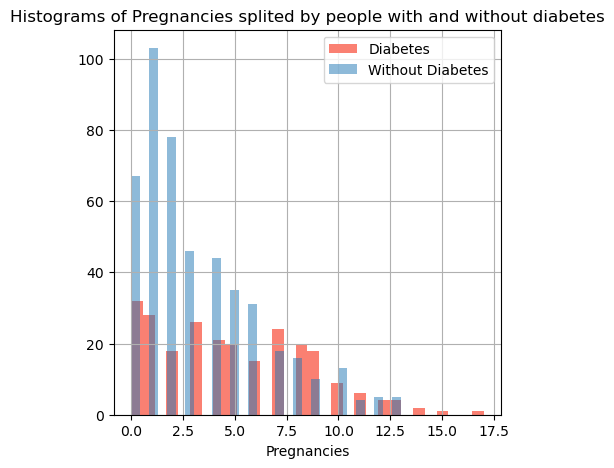

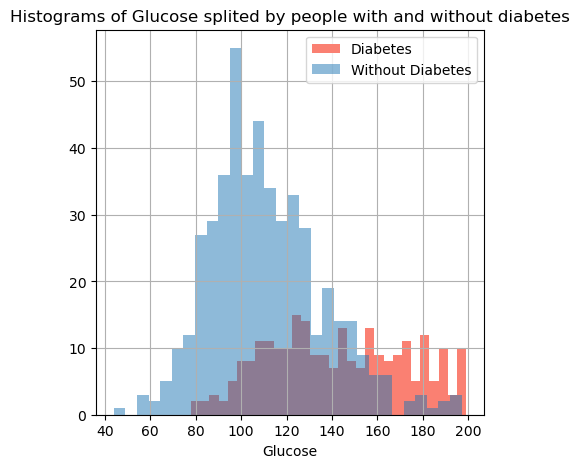

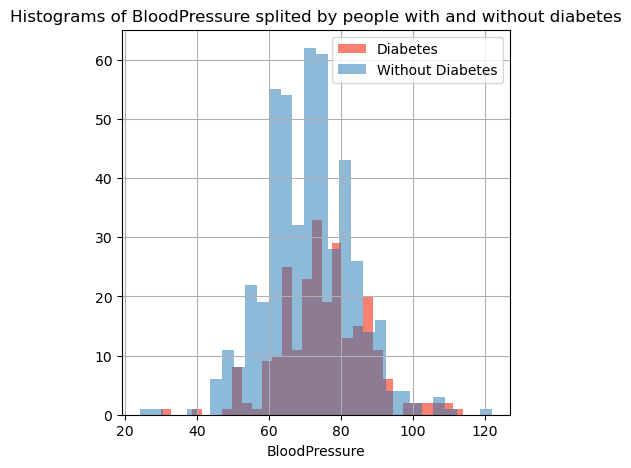

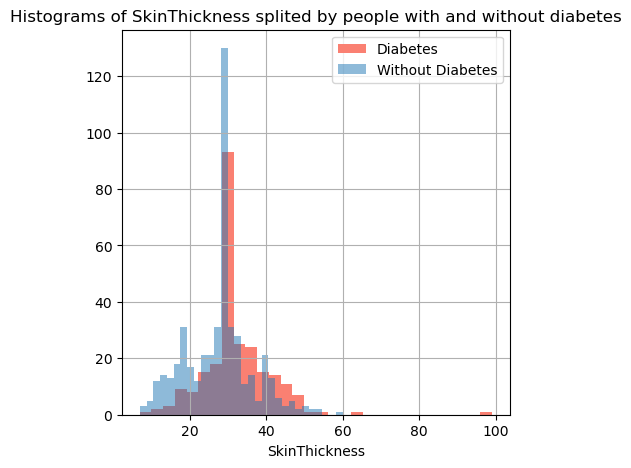

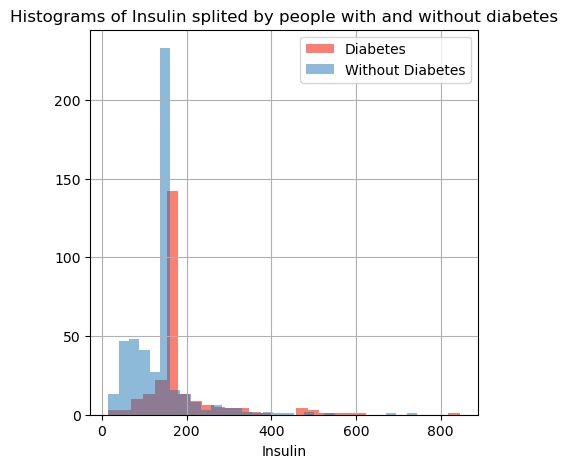

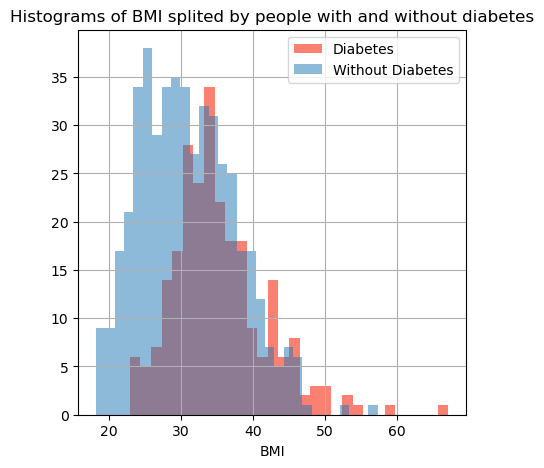

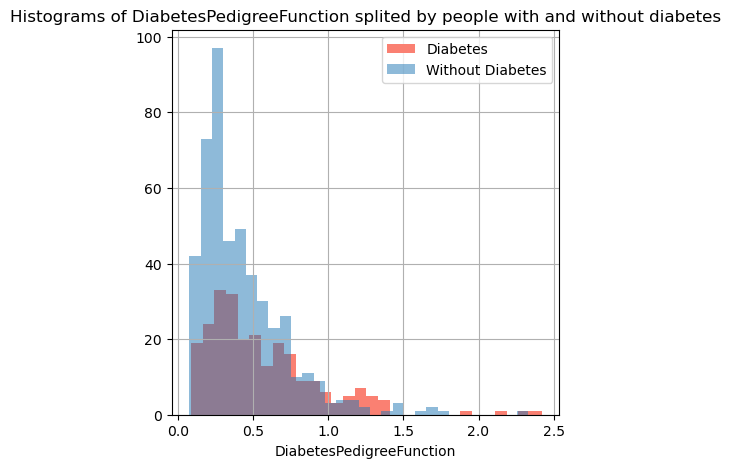

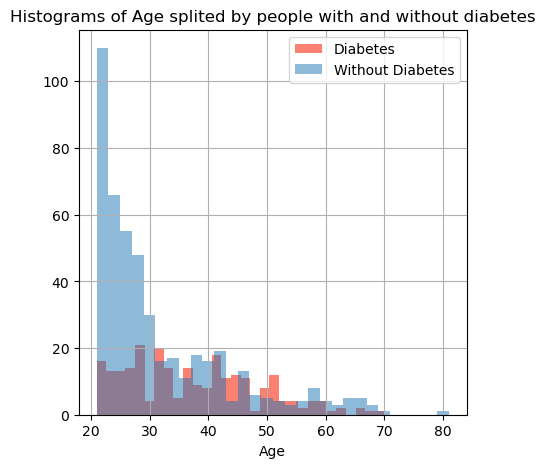

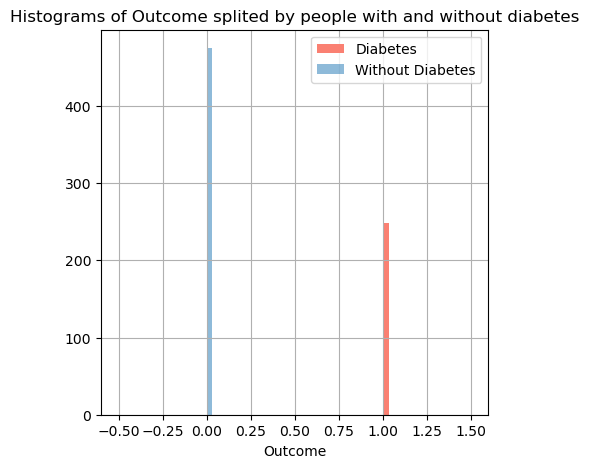

In [144]:
# plotting distributions
for feature in df_diabetes:
    df_diabetes[feature].hist(bins=30, figsize=(5,5),color='salmon', label='Diabetes')
    df_no_diabetes[feature].hist(bins=30, figsize=(5,5), alpha=0.5,label='Without Diabetes')
    plt.title(f'Histograms of {feature} splited by people with and without diabetes')
    plt.legend()
    plt.xlabel(feature)

    plt.show()


#### Key findings: <br>
As the risk of diabetes increases, individuals tend to gain more weight.<br>
People with diabetes have a higher tendency to gain weight.<br>
The insulin levels in individuals with diabetes are roughly half as compared to those without diabetes.<br>
On average, individuals with diabetes tend to have thicker skin. I have no idea, why...<br>
No significant differences in blood pressure for both groups.<br>
Individuals with diabetes have notably higher levels of glucose.<br>

-----

#### Are there any differences in the predictor variables between males and females (if gender information is available)?

<i> Information is not available<i>

---

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

-----

#### Scaling and normalization

DiabetesPedigreeFunction is skewed. So we can normilize it.

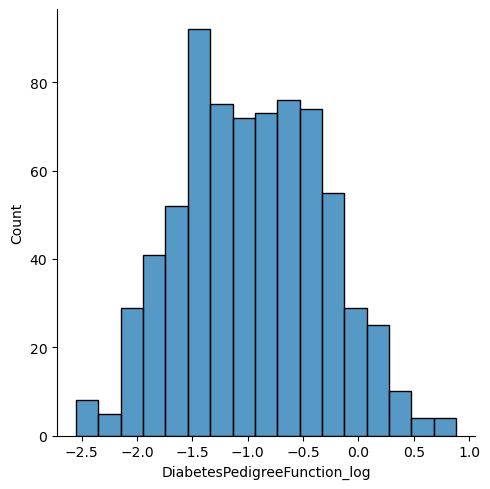

In [151]:
# log transformation
import numpy as np

df["DiabetesPedigreeFunction_log"] = df["DiabetesPedigreeFunction"].apply(np.log)
sns.displot(df["DiabetesPedigreeFunction_log"])

Scaling data with MinMaxScaler

In [165]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,DiabetesPedigreeFunction_log,Age_log
0,0.352941,0.670968,0.489796,0.304348,0.170741,0.314928,0.234415,0.483333,1.0,0.606798,0.642628
1,0.058824,0.264516,0.428571,0.239130,0.170741,0.171779,0.116567,0.166667,0.0,0.437892,0.288508
2,0.470588,0.896774,0.408163,0.241112,0.170741,0.104294,0.253629,0.183333,1.0,0.626977,0.312027
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0,0.221638,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0,0.983670,0.334822


# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

#### will use SVM algorithm

In [174]:
# assign X and y

X = df_scaled.drop(columns=['DiabetesPedigreeFunction', 'Outcome', 'Age_log'])
y= df_scaled['Outcome']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [177]:
X_train.shape, X_test.shape # checking shapes for Xs

((579, 8), (145, 8))

In [178]:
X_train.dtypes

Pregnancies                     float64
Glucose                         float64
BloodPressure                   float64
SkinThickness                   float64
Insulin                         float64
BMI                             float64
Age                             float64
DiabetesPedigreeFunction_log    float64
dtype: object

In [180]:
# import SVC from sklearn and use the Polynomial kernel
from sklearn import svm
clf=svm.SVC(kernel='poly')

# fit the training data
clf.fit(X_train,y_train)

SVC(kernel='poly')

In [181]:
y_pred=clf.predict(X_test)

In [182]:
# import confusion matrix from sklearn and print values

In [183]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:",cm)

Confusion matrix: [[91 11]
 [18 25]]


In [201]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
accuracy=metrics.accuracy_score(y_test, y_pred)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy)

Accuracy: 0.8


In [192]:
# checking precision:  Precision measures the accuracy of positive predictions made by the model.
# checking recall :measures the ability of the model to correctly identify all positive instances
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred)
print ("Precision:",precision)
recall = recall_score(y_test, y_pred)
print ("Recall:", recall)

Precision: 0.6944444444444444
Recall: 0.5813953488372093


In [187]:
# checking AUC score :  a metric used to evaluate the performance of a binary classification model
from sklearn.metrics import roc_auc_score

auc=roc_auc_score(y_test,y_pred)
print("AUC score:",auc)

AUC score: 0.7367761057911537


In [189]:
# checking F1 score : F1 score - a metric that balances precision and recall
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)

F1 score: 0.6329113924050633


In [193]:
# overall SVM model evaluation results

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Precision:",precision)
print ("Recall:", recall)
print("AUC score:",auc)
print("F1 score:", f1)

Accuracy: 0.8
Precision: 0.6944444444444444
Recall: 0.5813953488372093
AUC score: 0.7367761057911537
F1 score: 0.6329113924050633


In [ ]:
#### will use Decission Tree

In [194]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=0) #Descition Tree model


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [195]:
y_pred_gini = clf_gini.predict(X_test) #Prediction

In [202]:
accuracy_tree=metrics.accuracy_score(y_test, y_pred_gini)
precision_tree = precision_score(y_test, y_pred_gini)
recall_tree = recall_score(y_test, y_pred_gini)
auc_tree=roc_auc_score(y_test,y_pred_gini)
f1_tree = f1_score(y_test, y_pred_gini)

print("Accuracy Decision Tree VS SVM poly:",accuracy_tree,"VS",accuracy)
print ("Precision Decision Tree VS SVM poly:",precision_tree,"VS",precision)
print ("Recall Decision Tree:VS SVM poly", recall_tree,"VS",recall)
print("AUC score Decision Tree VS SVM poly:",auc_tree,"VS",auc)
print("F1 score Decision Tree VS SVM poly :", f1_tree,"VS",f1)

Accuracy Decision Tree VS SVM poly: 0.8068965517241379 VS 0.8
Precision Decision Tree VS SVM poly: 0.6595744680851063 VS 0.6944444444444444
Recall Decision Tree:VS SVM poly 0.7209302325581395 VS 0.5813953488372093
AUC score Decision Tree VS SVM poly: 0.7820337437300501 VS 0.7367761057911537
F1 score Decision Tree VS SVM poly : 0.6888888888888888 VS 0.6329113924050633


# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

* Glucose has strong relationship with Outcome variable (correlation coef is 0.46)

* On average, individuals with diabetes tend to have thicker skin

* Glucose, Blood Pressure, Skin Thickness, Insulin, BMI had noticeable outliers ( zeros).

* The Decision Tree model appears to perform slightly better across multiple metrics.Thought the fact that Precision for SMV model is better 0.69 VS 0.66 which is important part for deseace prediction. I would prefer to chose SMV model as the correct prediction of decease is our prioroty.